## Sigmiod

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

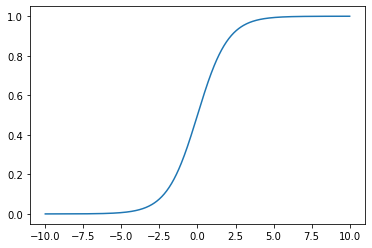

In [3]:
x = np.linspace(-10,10,500)
y = sigmoid(x)

plt.plot(x,y)
plt.show()

## 实现逻辑回归

In [4]:
from sklearn import datasets

iris = datasets.load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
X = X[y<2,:2]
y = y[y<2]

In [7]:
X.shape

(100, 2)

In [8]:
y.shape

(100,)

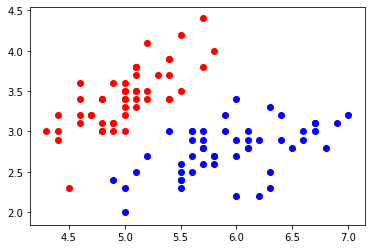

In [9]:
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()

### 使用逻辑回归

In [10]:
from PlayML.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,seed=666)

In [11]:
from PlayML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [12]:
log_reg.score(X_test,y_test)

1.0

In [13]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [14]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [15]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [16]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [17]:
log_reg.interception_

-0.6937719272911228

## 决策边界

In [18]:
def x2(x1):
    return (-log_reg.coef_[0]*x1-log_reg.interception_)/log_reg.coef_[1]

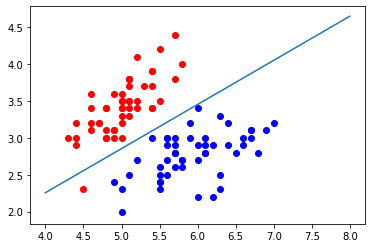

In [19]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)


plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.plot(x1_plot,x2_plot)

plt.show()

In [20]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(1,-1)
    
    )
    
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#FF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)
    

C:\ana\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


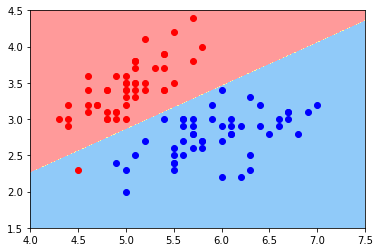

In [21]:
plot_decision_boundary(log_reg,axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()

### knn的决策边界

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [24]:
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

1.0

C:\ana\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


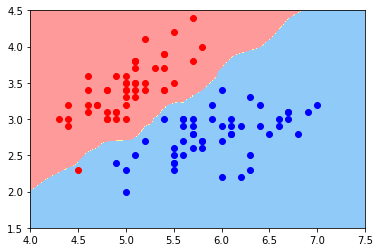

In [25]:
plot_decision_boundary(knn_clf,axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()

In [26]:
knn_clf_all = KNeighborsClassifier()

knn_clf_all.fit(iris.data[:,:2],iris.target)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

C:\ana\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


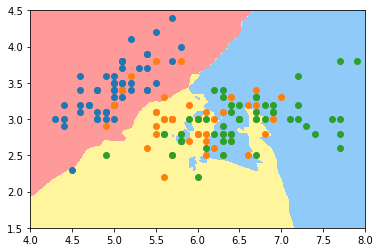

In [28]:
plot_decision_boundary(knn_clf_all,axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==2,1])
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1])

plt.show()

In [29]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)

knn_clf_all.fit(iris.data[:,:2],iris.target)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

C:\ana\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


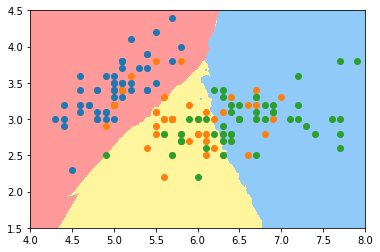

In [30]:
plot_decision_boundary(knn_clf_all,axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==2,1])
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1])

plt.show()